<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Timing_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [2]:
!wget https://cs.uit.edu.vn/data.txt

--2020-06-10 07:41:32--  https://cs.uit.edu.vn/data.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84410 (82K) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]  82.43K  --.-KB/s    in 0.04s   

2020-06-10 07:41:32 (2.12 MB/s) - ‘data.txt’ saved [84410/84410]



In [3]:
!ls

data.txt  sample_data


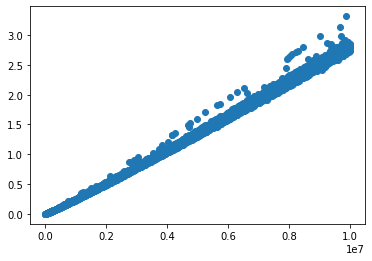

In [4]:
data=pd.read_csv('data.txt',header=None)
data.columns=['Complexity','Timing']
plt.scatter(data['Complexity'],data['Timing'])

In [12]:
x=data[['Complexity']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)
#check missingdata
all_data_na=(data.isnull().sum())/len(data)*100
all_data_na

Complexity    0.0
Timing        0.0
dtype: float64

In [23]:
y_train.values.shape

(4168, 1)

In [0]:
def Feature_Engineering(x):
   #feature scaling: min-max normalization
   print(x.shape)
   square=np.power(x,2)
   log_arr=(np.log2(x,where=(x!=0)))*x
   x=np.append(x,square,axis=1)
   x=np.append(x,log_arr,axis=1)
   min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
   x_after_mmscaler=min_max_scaler.fit_transform(x) 
   print(x.shape)

(5211, 1)
(5211, 3)


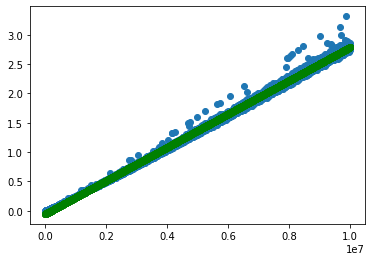

In [28]:
poly_model=make_pipeline(Feature_Engineering(x),
                         LinearRegression())
poly_model.fit(X_train.values,y_train.values)
y_fit=poly_model.predict(X_train.values)
plt.scatter(X_train,y_train)
plt.plot(X_train,y_fit,'go')

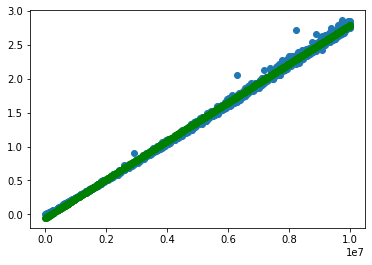

In [29]:
y_predict=poly_model.predict(X_test.values)
plt.scatter(X_test.values,y_test.values)
plt.plot(X_test.values,y_predict,'go')

In [51]:
def Prediction(x,train=X_train,model=poly_model):
   arr_x=np.array([x])
   pred=model.predict(arr_x[:,np.newaxis])
   print(pred[0][0])
Prediction(5636284)

1.5469514208462225
